# Task 3: Customer Segmentation / Clustering

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
customers = pd.read_csv(r'C:\Users\hp\Downloads\Assignment_datasets_Customers\Customers.csv')
products = pd.read_csv(r'C:\Users\hp\Downloads\Assignment_datasets_Products\Products.csv')
transactions = pd.read_csv(r'C:\Users\hp\Downloads\Assignment_datasets_Transactions\Transactions.csv')


### 3.1 Data Preprocessing for Clustering

In [3]:
# Merge customer data with transaction data
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Feature engineering for clustering: we use TotalValue and Quantity
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
}).reset_index()

print(customer_features.head())


  CustomerID  TotalValue  Quantity
0      C0001     3354.52        12
1      C0002     1862.74        10
2      C0003     2725.38        14
3      C0004     5354.88        23
4      C0005     2034.24         7


#### I am using KMeans clustering for this problem because By using KMeans, we can effectively group customers into segments based on their spending behavior and transaction quantities, allowing the business to make data-driven decisions for targeted marketing and improving customer experience.

### 3.2 Applying Clustering (KMeans)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[9.17174194e+02 4.61290323e+00]
 [5.40572244e+03 1.88292683e+01]
 [3.94204195e+03 1.35365854e+01]
 [7.43305333e+03 2.40833333e+01]
 [2.55551595e+03 1.05135135e+01]]


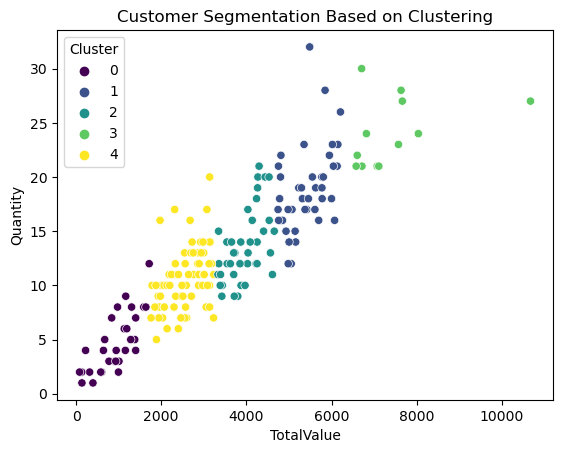

In [4]:

from sklearn.cluster import KMeans

# Initialize the KMeans model with 5 clusters
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Perform clustering based on 'TotalValue' and 'Quantity'
customer_features['Cluster'] = kmeans_model.fit_predict(customer_features[['TotalValue', 'Quantity']])

# Print the coordinates of the cluster centers
print("Cluster Centers:\n", kmeans_model.cluster_centers_)

# Map cluster labels to the merged dataset using CustomerID as a key
merged_data['Cluster'] = merged_data['CustomerID'].map(
    customer_features.set_index('CustomerID')['Cluster']
)

# Visualize the clustering results
sns.scatterplot(
    x='TotalValue', 
    y='Quantity', 
    hue='Cluster', 
    data=customer_features, 
    palette='viridis'
)
plt.title('Customer Segmentation Based on Clustering')
plt.show()



### 3.3 Evaluating Clustering (DB Index)

In [5]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(customer_features[['TotalValue', 'Quantity']], customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.5253776566090241


### 3.4 Saving Clustering Results

In [6]:
# Save clustering results to a CSV file
customer_features.to_csv('Clustering_Results.csv', index=False)
